# Asynchronous JavaScript
비동기 JavaScript


## 비동기


**synchronous** 동기

프로그램의 실행 흐름이 순차적으로 진행

: 하나의 작업이 완료된 후에 다음 작업이 실행되는 방식

-synchronous 예시

1. 메인 작업이 모두 수행되어야 마지막 작업 수행됨.
2. 함수의 작업이 완료될 때까지 기다렸다가 값을 반환해야 계속 진행할 수 있음(동기 함수)
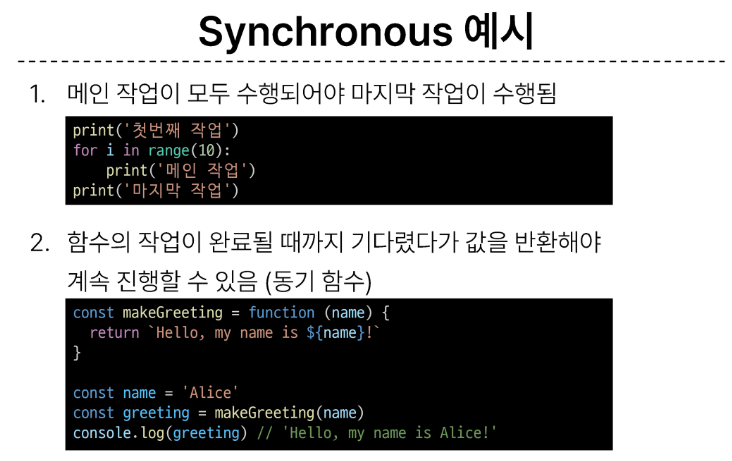


**Asynchronous** 비동기

프로그램의 실행 흐름이 순차적이지 않으며, 작업이 완료되기를 기다리지 않고 다음 작업이 실행되는 방식
--> 작업의 완료 여부를 신경쓰지 않고 동시에 다른 작업들을 수행할 수 있음


**Asynchronous 특징**

병렬적 수행. 당장 처리를 완료할 수 없고 시간이 필요한 작업들은 별도로 요청을 보낸 뒤 응답이 빨리 오는 작업부터 처리

-asychronous 예시

1. Gmail에서 메일 전송을 누르면 목록 화면으로 전환되지만 실제로 메일을 보내는 작업은 병렬적으로 별도로 처리됨
2. 
3. 브라우저는 웹페이지를 먼저 처리되는 요소부터 그려 나가며 처리가 오래 걸리는 것들은 별도로 처리가 완료 되는대로 병렬적으로 처리함
   
4. 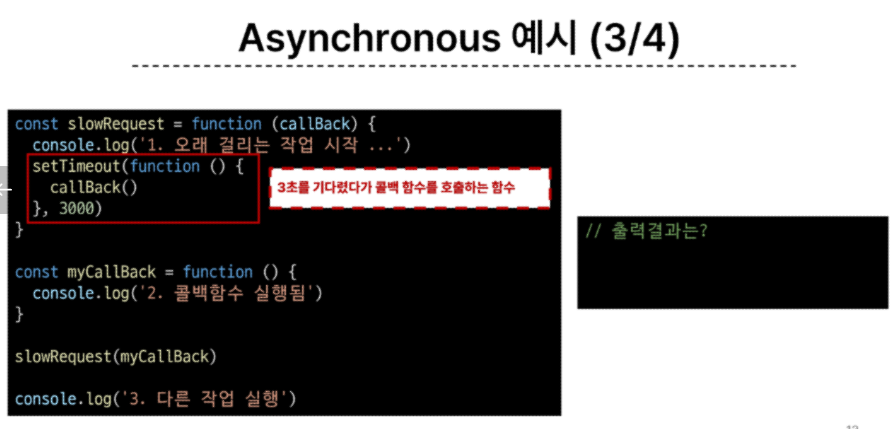
   
5. 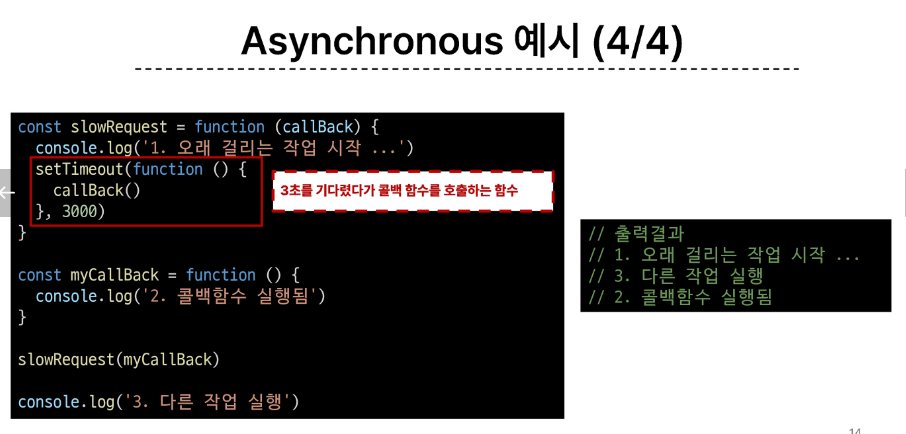


## JavaScript와 비동기


**Single Thread**

thread : 작업을 처리할 때 실제로 작업을 수행하는 주체.

multi-thread : 업무를 수행할 수 있는 주체가 여러 개.

JavaScript는 single thread 언어이다.

--> 한번에 여러 일을 수행할 수 없음(하나의 작업을 요청한 순서대로 처리할 수 밖에 없다)

--> JavaScript로 비동기 처리를 하기 위해서는 도와주는 환경이 필요. JavaScript에서 비동기와 관련한 작업은 "브라우저" 또는 "Node"같은 환경에서 처리.

JavaScript가 한번에 한 가지 작업밖에 못하니 바로 처리할 수 없는 건 browser가 도와준다(+node)


**브라우저 환경에서의 JavaScript 비동기 처리 동작 방식**

1. 모든 작업은 call stack으로 들어간 후 처리된다.

2. 오래 걸리는 작업이 call stack(FILO)으로 들어오면 Web API로 보내 별도로 처리하도록 한다

3. Web API에서 처리가 끝난 작업들은 곧바로 call stack 으로 들어가지 못하고 Task Queue(FIFO)에 순서대로 들어간다.

4. Event Loop가 call stack이 비어있는 것을 계속 체크하고 call stack이 비면 task Queue에서 가장 오래된(가장 먼저 처리되어 들어온) 작업을 call stack으로 보낸다.

(일단 call stack으로 들어감. 그중 오래 걸리는 작업 들어오면 wed API로 보내버리고 처리가 끝나면 task queue로 순서대로 들어감. 그 후 call stack이 비면 순서대로 call stack으로 보낸다.)

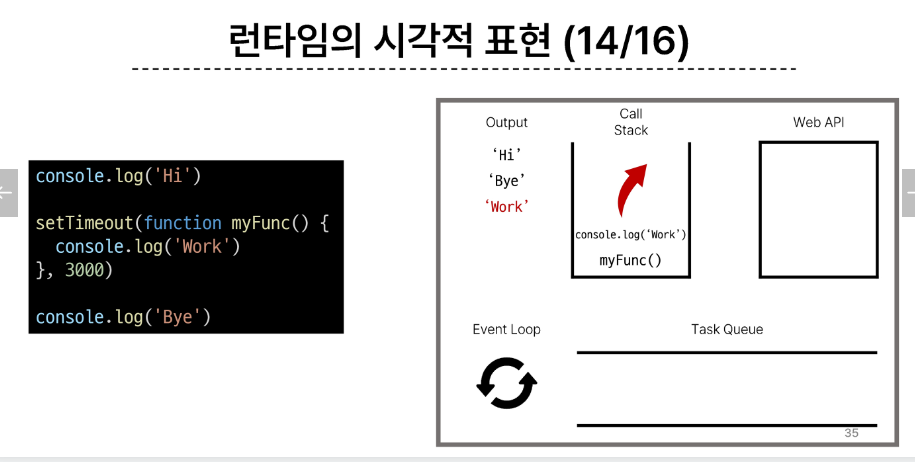

이 예시에서 console.log("work")가 3초 뒤에 출력된다고 할 수 있을까? (X)
이전에 다른 작업이 먼저 끝나고 queue에 들어있다면 그 결과가 먼저 실행되고 출력될 것이다.


**브라우저 환경에서의 JavaScript 비동기 처리 관련 요소**

1. JavaScript Engine의 Call stack 
   
   : 요청이 들어올 때 마다 순차적으로 처리하는 Stack(LIFO)
    기본적인 JS의 Single Thread 작업 처리
   
2. Web API

    : JS engine이 아닌 브라우저에서 제공하는 runtime 환경
     시간이 소요되는 작업을 처리(setTimout, DOM Event, AJAX 요청 등)
     DOM event-> event listener도 callback 함수를 받음(실행되는 동안 다른 코드가 실행된다~)

3. Task Queue (Callback Queue)

    : 비동기 처리된 Callback 함수가 대기하는 Queue(FIFO)

4. Event Loop
   
   : task가 들어오길 기다렸다가 task가 들어오면 이를 처리하고, 처리할 task가 없는 경우엔 잠드는, 끊임없이 돌아가는 JavaScipt 내 loop
   call stack과 task queue를 지속적으로 모니터링
   call stack이 비어있는지 확인 후 비어 있다면 task queue에서 대기 중인 오래된 작업을 call stack으로 push

**정리**

JavaScript는 한 번에 하나의 작업을 수행하는 single thread 언어로 동기적 처리를 진행.
하지만 브라우저 환경에서는 Web API에서 처리된 작업이 지속적으로 task queue를 거쳐 event loop에 의해 call stack에 들어와 순차적으로 실행됨으로써 비동기 작업이 가능한 환경이 됨

## AJAX

**AJAX** 
Asynchronous JavaScript + XML(JSON)

JavaScript의 비동기 구조와 XML 객체를 활용해 비동기적으로 서버와 통신하여 웹 페이지의 일부분만을 업데이트하는 웹 개발 기술

"X"가 XML을 의미하긴 하지만, 요즘은 더 가벼운 용량과 JavaScript의 일부라는 장점 때문에 JSON을 더 많이 사용함

**XMLHttpRequest 객체** (=XHR object)

서버와 상호작용할 때 사용하며 페이지의 새로고침 없이도 URL에서 데이터를 가져올 수 있음.

사용자의 작업을 방해하지 않고 페이지의 일부를 업데이트. 주로 AJAX프로그래밍에 많이 사용됨.

 
**event handler는 비동기 프로그래밍의 한 형태**

이벤트가 발생할 때마다 호출되는 함수(callback function)를 제공하는 것

XMLHttpRequest(XHR)는 JavaScript를 사용하여 서버에 HTTP 요청을 할 수 있는 객체

HTTP 요청은 응답이 올때까지의 시간이 걸릴 수 있는 작업이라 비동기 API이며, 이벤트 핸들러를 XHR 객체에 연결해 요청의 진행상태 및 최종 완료에 대한 응답을 받음



### Axios

JavaScript에서 사용되는 HTTP 클라이언트 라이브러리
: 서버와의 HTTP 요청과 응답을 간편하게 처리할 수 있도록 도와주는 도구
(python에서 사용되는 http 클라이언트 라이브러리=> requests)


XHR 객체를 서버로 보낼건데 이를 쉽게 도와주는 라이브러리->axios

JavaScript로 비동기 요청을 보내면 코드도 길어지고 복잡해짐. 이를 쉽게 도와주는 라이브러리.


CDN으로 설치해 사용
https://axios-http.com/


**Axios 구조**

get, post 등 여러 http request method 사용 가능

then method를 사용해서 "성공하면 수행할 로직", 
catch method를 사용해서 "실패하면 수행할 로직" 작성

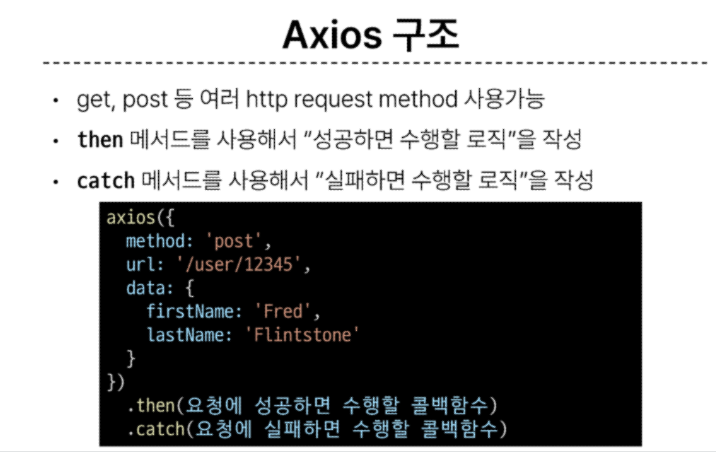


**정리**

axios는 브라우저에서 비동기로 데이터 통신을 가능하게 하는 라이브러리.
- 브라우저를 위해 XMLHttpRequest 생성

같은 방식으로 DRF(Django Rest Framework)로 만든 API 서버로 요청을 보내서 데이터를 받아온 후 처리할 수 있도록 함

DRF는 응답으로 문서를 주지 않는다. JSON을 줌. JSON을 axios로 받아 처리해야함
--> 다음시간에 django랑 같이 해서 DRF 서버와 소통해보겠습니다~~

In [ ]:
<!-- 고양이 사진 가져오기 실습 -->

<!DOCTYPE html>
<html lang="en">

<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Document</title>
</head>
 
  
<body>
  <script src="https://cdn.jsdelivr.net/npm/axios/dist/axios.min.js"></script>
  <script>

  const URL = "https://api.thecatapi.com/v1/images/search/"
  // response ==request.get(url)
  // const response = axios({
  //   method : "get",
  //   url : URL
  // })  

  axios({
    method : "get",
    url : URL
  }) // 응답 객체: promise --> .then으로 들어감
  // console.log(response)
  // axios -요청 .then-응답 --> 바로 처리되지 않음--> JS는 이를 비동기처리 할 것
  // .then(이전 요청이 성공했을 때 실행하는 콜백함수)
  .then((response) => {
    console.log(response)
    console.log(response.data)
    console.log(response.data[0].url)
  })
  .catch((error) => {
    console.log(error)
  })
  console.log("야옹야옹")
  

  
  </script>
</body>

</html>


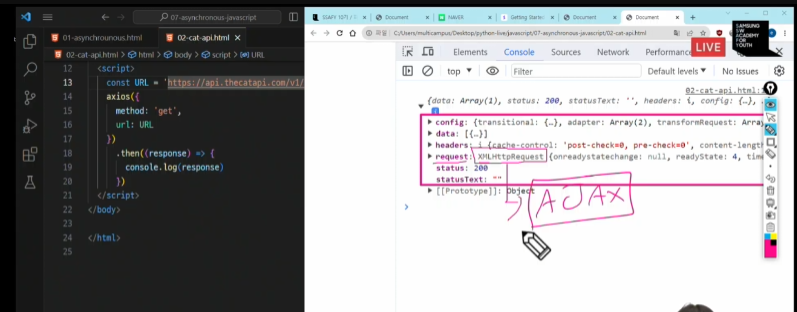

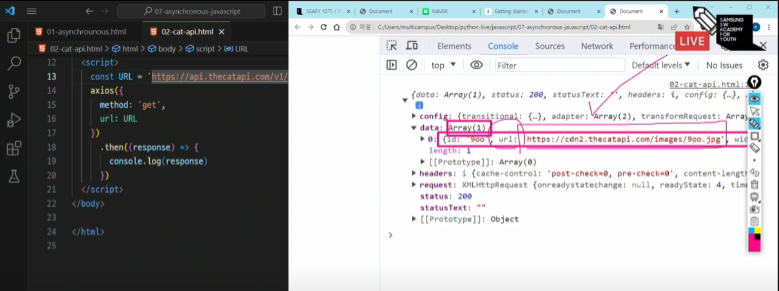

axios로 요청을 보내고 그게 성공하면 결과 객체가 .then이라는 함수의 callback함수 인자로 들어온다.

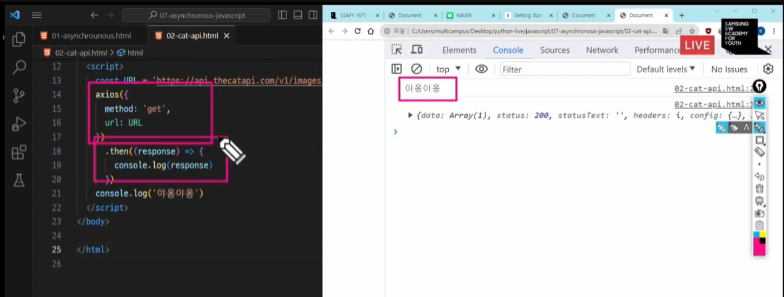

JS가 axios가 바로 처리되지 않으니 Web API로 보내버리고 비동기 처리를 했으므로 야옹야옹이 먼저 출력됨.

call stack으로 돌아오니까 call back 함수.

.catch

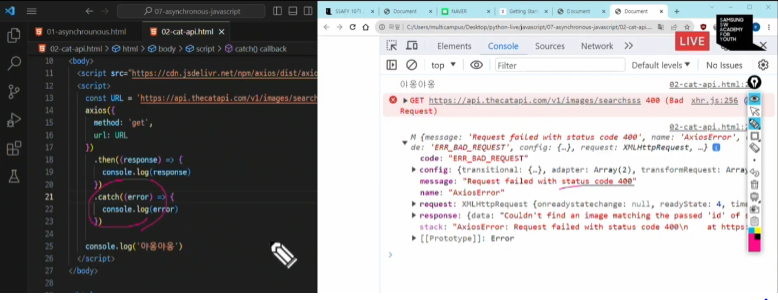




고양이 사진 가져오기 실습 심화

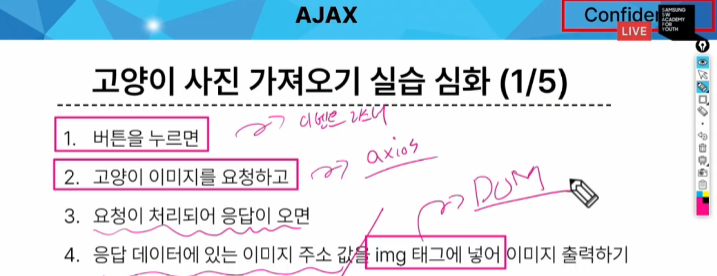

In [ ]:
<!DOCTYPE html>
<html lang="en">

<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Document</title>
</head>

<body>
  <button>냥냥펀치</button>
  <script src="https://cdn.jsdelivr.net/npm/axios/dist/axios.min.js"></script>
  <script>
    const URL = 'https://api.thecatapi.com/v1/images/search/'
    const btn = document.querySelector("button")

    const getCats = function () {
      axios({
    method : "get",
    url : URL
  }) 
    .then((response) => {
      // console.log(response)
      // console.log(response.data)
      // console.log(response.data[0].url)
      const imgUrl = response.data[0].url
      const imgTag = document.createElement("img")
      imgTag.setAttribute("src", imgUrl)
      document.body.appendChild(imgTag)

      })
    .catch((error) => {
      console.log(error)
      })
    }

    btn.addEventListener("click", getCats)
  </script>
</body>
</html>


## Callback과 Promise


### 비동기 콜백


**비동기 처리의 단점**

비동기 처리의 핵심은 Web API로 들어오는 순서가 아니라 작업이 완료되는 순서에 따라 처리한다는 것. --> 코드의 실행 순서가 불명확하다. 처리 순서를 보장할 수 없다!

--> 해결 : 콜백 함수 사용


**비동기 콜백**

: 비동기적으로 처리되는 작업이 완료되었을 때 실행되는 함수

 연쇄적으로 발생하는 비동기 작업을 순차적으로 동작할 수 있게 함

 작업의 순서와 동작을 제어하거나 결과를 처리하는 데 사용

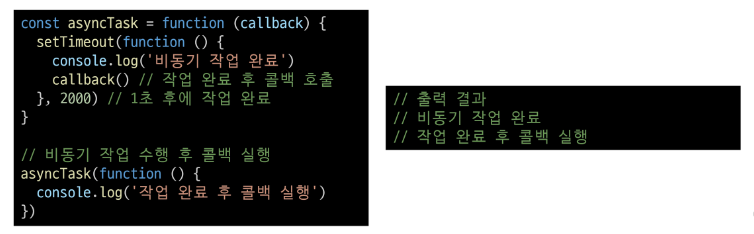


**비동기 콜백의 한계**

: 비동기 콜백 함수는 보통 어떤 기능의 실행 결과를 받아서 다른 기능을 수행하기 위해 많이 사용됨.

--> 비슷한 패턴의 발생.
(A 처리 후 결과 반환시 첫 번째 callback 함수 실행, 첫 번째 callback 함수 종료시 두 번째 callback 함수 실행, 두 번째 ~~~)


**콜백 지옥** 진짜로 이렇게 부르는 줄은 몰랐는데

: 비동기 처리를 위한 콜백을 작성할 때 마주하는 문제. 코드 작성 형태가 마치 피라미드와 같다 해서 pymarid of doom(파멸의 피라미드)라고도 부른다.... 진짜로?

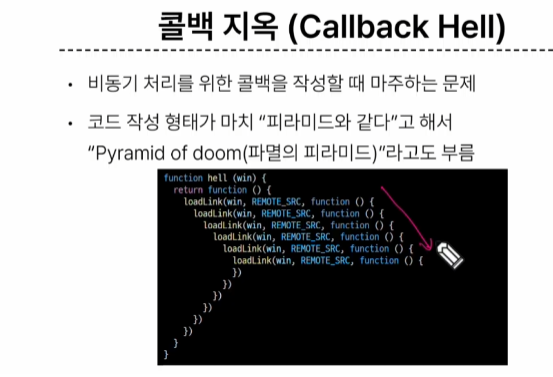

비동기 콜백과 Promise의 목적은 비동기 작업을 순차적으로 한다는 것에서 동일.
비동기 콜백은 indent level이 깊어진다는 단점 -> promise로 해결.  promise 객체 기반의 클라이언트 라이브러리가 axios


**콜백 함수 정리**

: 콜백 함수는 비동기 작업을 순차적으로 실행할 수 있게 하는 반드시 필요한 로직이다.

비동기 코드를 작성하다보면 콜백 함수로 인한 콜백 지옥은 빈번히 나타나는 문제이며 가독성, 유지보수에서 어려움이 발생할 수 밖에 없다.

## Promise

**Promise**

JavaScript에서 비동기 작업의 결과를 나타내는 객체(비동기 작업의 완료 또는 실패를 나타내는 객체)
.

비동기 작업이 완료되었을 때 결과 값을 반환하거나, 실패 시 에러를 처리할 수 있는 기능을 제공

promise 기반의 클라이언트가 바로 이전에 사용한 Axios 라이브러리.
-성공 시 then(), 실패시 catch()

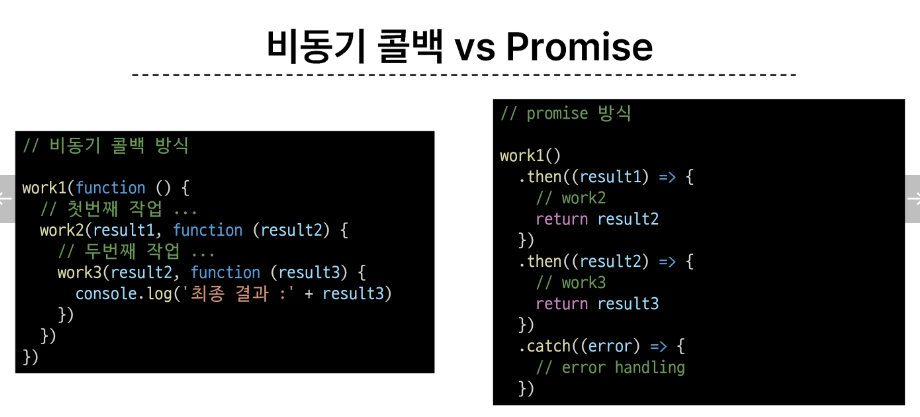


**Axios**

JavaScrip에서 사용되는 promise 기반 HTTP 클라이언트 라이브러리.


### then & catch

**then(callback)**
: 요청 작업이 성공하면 callback 실행. callback은 이전 작업의 성공 결과를 인자로 전달 받음 --> then chaining

**catch(callback)**
: then()이 하나라도 실패하면 callback 실행. callback은 이전 작업의 실패 객체를 인자로 전달받음


- then과 catch는 모두 항상 promise 객체를 반환 --> 계속해서 chaining을 할 수 있음
- axios로 처리한 비동기 로직이 항상 promise 객체를 반환-->then을 계속 이어 나가면서 작성할 수 있게 됨 (비동기적인 처리에서 순서를 보장할 수 있다)

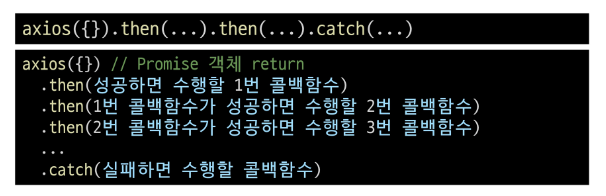

--> 비동기에 순서를 부여함. 하지만 indent level이 깊어지지않음
주의 > 앞의 .then에서 return이 있어야 함.


**then method chaining의 목적**

비동기 작업의 "순차적인" 처리 가능. 코드를 보다 직관적이고 가독성 좋게 작성할 수 있도록 도움


**then method chaining의 장점**

1. 가독성
    - 비동기 작업의 순서와 의존 관계를 명확히 표현할 수 있어 코드의 가독성이 향상됨

2. 에러 처리
    - 각각의 비동기 작업 단계에서 발생하는 에러를 분할해서 처리 가능

3. 유연성
    - 각 단계마다 필요한 데이터를 가공하거나 다른 비동기 작업을 수행항 수 있어서 더 복잡한 비동기 흐름을 구성할 수 있음

4. 코드 관리
    - 비동기 작업을 분리하여 구성하면 코드를 관리하기 용이함


-- then method chaining 예시 

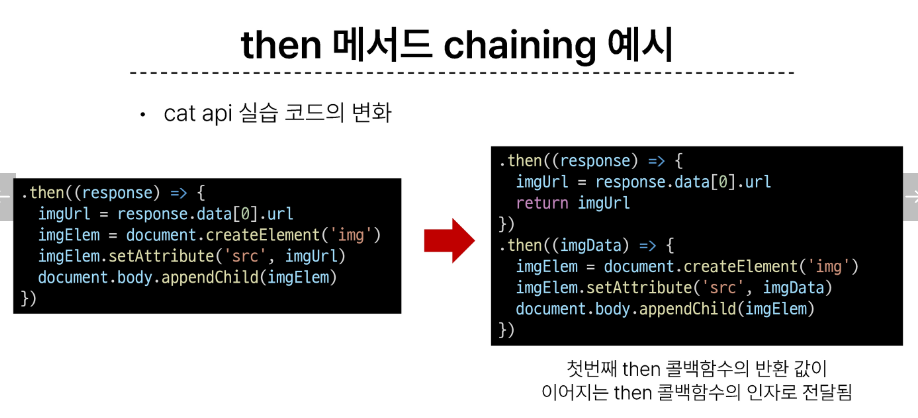


**promise가 보장하는 것(vs 비동기 콜백)**

1. 콜백 함수는 JavaScript의 event loop가 현재 실행 중인 call stack을 완료하기 이전엔 절대 호출되지 않음.
   
    - promise callback 함수는 event queue에 배치되는 엄격한 순서로 호출됨

2. 비동기 작업이 성공하거나 실패한 뒤에 .then() 메서드를 이용하여 추가한 경우에도 호출 순서를 보장하며 동작

3. .then()을 여러 번 사용하여 여러 개의 callback 함수를 추가할 수 있음

    - 각각의 callback은 주어진 순서대로 하나하나 실행하게 됨
  
    - chaining은 promise의 가장 뛰어난 장점(깊어지지 않고 callback 함수를 호출할 수 있음)



In [ ]:
<!-- 고양이 사진 가져오기 심화 -> then 쪼개기 -->
<!DOCTYPE html>
<html lang="en">

<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Document</title>
</head>

<body>
  <button>냥냥펀치</button>
  <script src="https://cdn.jsdelivr.net/npm/axios/dist/axios.min.js"></script>
  <script>
    const URL = 'https://api.thecatapi.com/v1/images/search/'
    const btn = document.querySelector("button")

    const getCats = function () {
      axios({
    method : "get",
    url : URL
  }) 
    .then((response) => {
      // console.log(response)
      // console.log(response.data)
      // console.log(response.data[0].url)
      // 1. 응답받은 결과에서 url을 찾고
      // 2. img 태그를 만들고
      // 3. img 속성을 채우고
      // 4. body에 img 속성을 추가한다.
      // 이걸 마음대로 쪼개서 then으로 작성 가능.
      const imgUrl = response.data[0].url
      const imgTag = document.createElement("img")
      imgTag.setAttribute("src", imgUrl)
      document.body.appendChild(imgTag)

      })
    .catch((error) => {
      console.log(error)
      })
    }

    btn.addEventListener("click", getCats)

    

  </script>
</body>

</html>


In [ ]:
<!DOCTYPE html>
<html lang="en">

<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Document</title>
</head>

<body>
  <button>냥냥펀치</button>
  <script src="https://cdn.jsdelivr.net/npm/axios/dist/axios.min.js"></script>
  <script>
    const URL = 'https://api.thecatapi.com/v1/images/search/'
    const btn = document.querySelector("button")

    const getCats = function () {
      axios({
    method : "get",
    url : URL
  }) 
    .then((response) => {
      // console.log(response)
      // console.log(response.data)
      // console.log(response.data[0].url)
      // 응답으로부터 필요한 img url만 구하기
      const imgUrl = response.data[0].url
      return imgUrl
      }) // 이렇게 쪼개면 나중에 유지보수에 좋음. 에러 관리하기 쉽다
    .then((response) => {
      const imgUrl = response
      const imgTag = document.createElement("img")
      imgTag.setAttribute("src", imgUrl)
      document.body.appendChild(imgTag)
    })
    .catch((error) => {
      console.log(error)
      })
    }

    btn.addEventListener("click", getCats)

    

  </script>
</body>

</html>


+ 비동기를 사용하는 이유
  
  사용자 경험 때문에. 동기식 처리를 할 경우/ 아주 큰 데이터를 불러온 뒤 실행되는 앱이 있다면 사용자들은 그때까지 앱이 멈춘 것 같은 경험을 겪게 된다.
  동기식 처리는 특정 로직이 실행되는 동안 다른 로직 실행을 차단하기 때문에 마치 프로그램이 응답하지 않는 듯한 사용자 경험을 만든다.
  먼저 처리 되는 부분부터 보여줌 

---
라이브 후 실습

In [ ]:
// 라면을 끓이는 과정

console.log("라면을 끓인다. (각 과정이 준비되는 데 1~3초 시간이 걸린다")

// 물을 끓는데 3초가 걸림
setTimeout(() => {
    console.log("1. 물을 끓인다.")
}, 3000);

// 스프랑 면을 넣는다
setTimeout(() => {
    console.log("2. 스프랑 면을 넣는다.")
}, 2000);

// 계란을 넣는다.
setTimeout(() => {
    console.log("3. 계란을 넣는다.")
}, 1000);

console.log("완성~!~!~!!!!~!~!")

// callback 함수로 작성

setTimeout(() => {
    console.log("1. 물을 끓인다.") 
    setTimeout(() => {
     console.log("2. 면과 스프를 넣는다.")
     setTimeout(() => {
        console.log("3. 계란을 넣는다") 
     }, 1000);
    }, 2000);
 }, 3000);
 
 // 이처럼 callback함수로 작성하면 indent level이 깊어질 수 밖에 없다.

 // promise로 구현하기

 /**
 손님이 분식점에서 라면을 주문했다--> 내가 만든 화면을 사용자가 요청함.
 라면 == 화면
 라면 재료 준비 == 화면을 보여주는 데 필요한 데이터들
 다 완성되면 서빙 == 다 완성되면 화면 보여주기

 promise의 세가지 상태
 대기(pending)- 이행하지도, 거부하지도 않은 초기 상태
 이행(fulfilled)- 연산이 성공적으로 완료됨
 거부(rejected)- 연산이 실패함

 promise object 사용법
 new Promise((resolve, reject) => {

    if(비동기작업 완료 조건){
        return resolve(value) // 비동기작업이 성공했을 때 리턴하고싶은 값이 있으면 value
    } else if (비동기작업 실패 조건) {
        return reject(value) // 비동기작업이 실패했을 때 리턴하고 싶은 값이 있으면 value
    }

    .then()과 .catch()는 Promise 객체에 사용하는 메서드.
 })
*/

// 물을 끓이는 함수. 3초 소요
const water = function (ramen) {
    return new Promise((resolve, reject) => {
        setTimeout(() => {
           console.log("1. 물을 끓인다") 
           ramen.push("물")
           return resolve(ramen) // 이 비동기 작업이 잘 끝났을 때 resolve 함수로 ramen 반환
            // return reject(ramen) // 거부 반환
    }, 3000);
    })
}

const soupAndNoodle = function(ramen) {
    return new Promise((resolve, reject)=> {
        setTimeout(() => {
            console.log("2. 스프와 면을 넣는다.")
            ramen.push("스프")
            ramen.push("면")
            return resolve(ramen)
        }, 2000);
    }) 
}

const egg = function(ramen) {
    return new Promise((resolve, reject)=> {
        setTimeout(() => {
            console.log("3. 계란을 넣는다.")
            ramen.push("계란")
            return resolve(ramen)
        }, 2000);
    }) 
}

const ramen = []

// axios로 요청을 보내고 server에서 성공적으로 실행되어서 응답을 보내면 then으로 보냄

// water가 끝나야 실행되는 .then 함수
water(ramen)
    .then((ramen) => {
        return soupAndNoodle(ramen)
    })
    .then((ramen) => {
        return egg(ramen)
    })
    // 중간 에러 발생 시 실행할 함수
    .catch((err)=> {
        console.log("라면을 끓이는 도중에 문제가 발생 : ", err)
    })
    .then(() => {
        console.log("라면 완성~!~!~!~!~!!~!~ : ", ramen)
    })

// resolve, reject

//await
/*async : 비동기함수로 만들어줌
async 함수 안에서 await 키워드를 만나면 await한 promise가 완료(이행 또는 거절)될 때까지
 일시정지됨.*/